#Deep Learning Architechture - Le Duc Anh - 7/7/2025

#Deep Neural Networks

##Theories/How Deep NN works

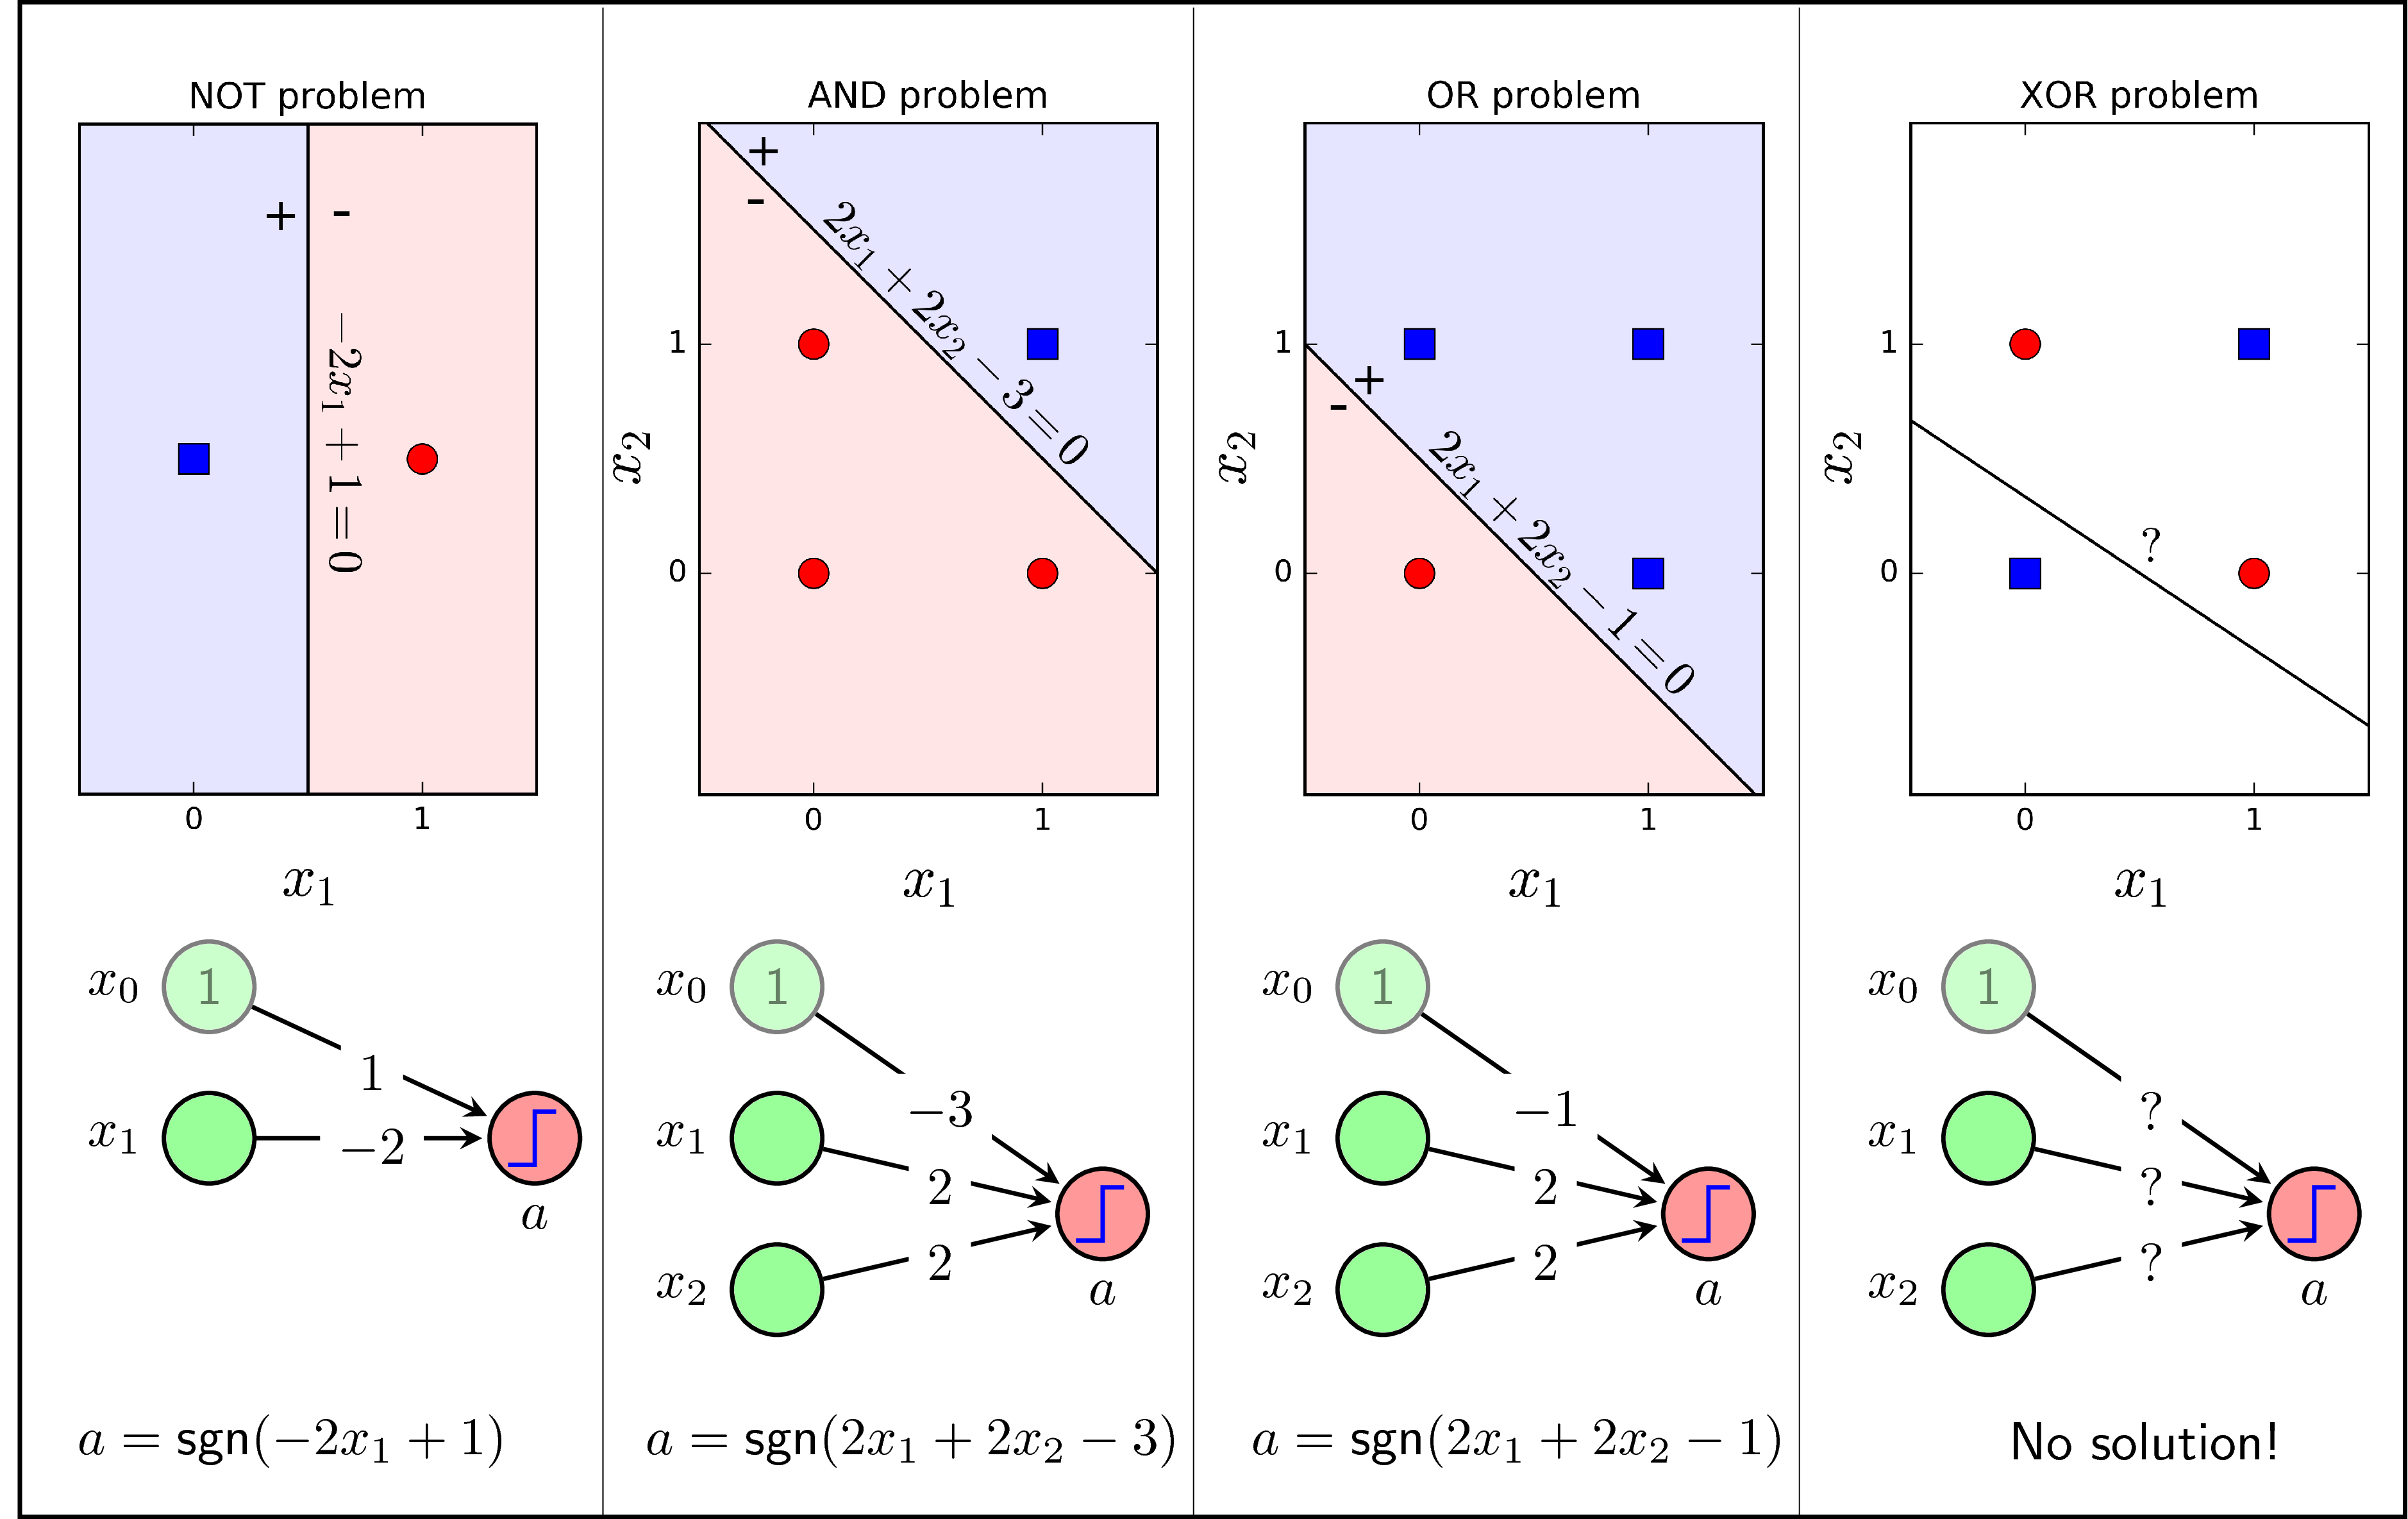

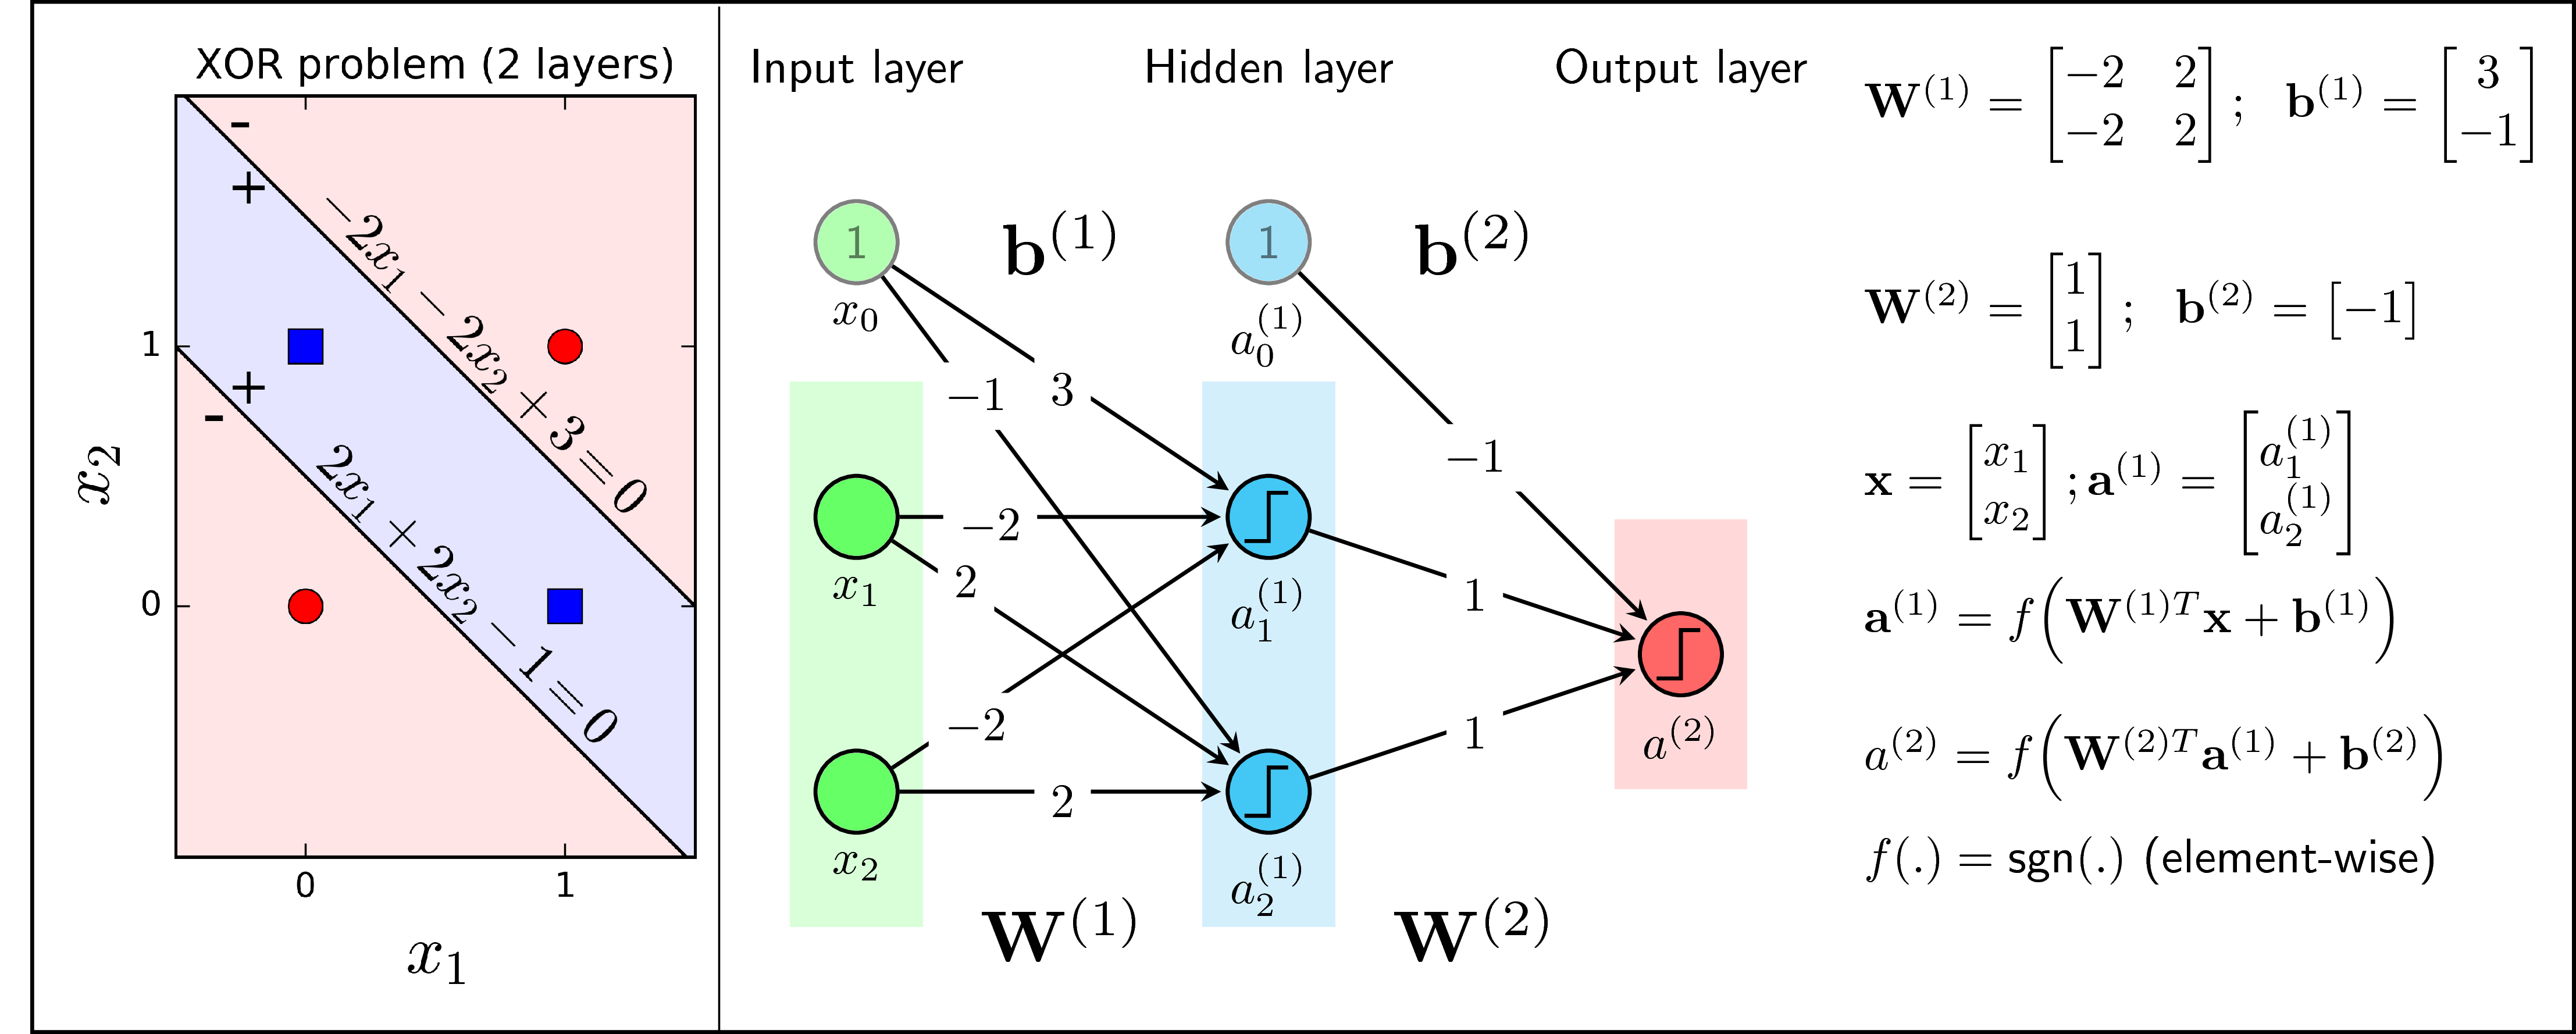


Conventionally, when to classify certain data, we either use classification methods, and in this given example, if we only use them, how can we classify the XOR problem. Thus we can use neural network to do this automatically without create another linear classification or any kind of looping mechanism what would completely destroy our computer.

what we would do, is to dictate the number of the hidden layer, certain looping to study and create the model. and then give the final output - which contains both of the lines.

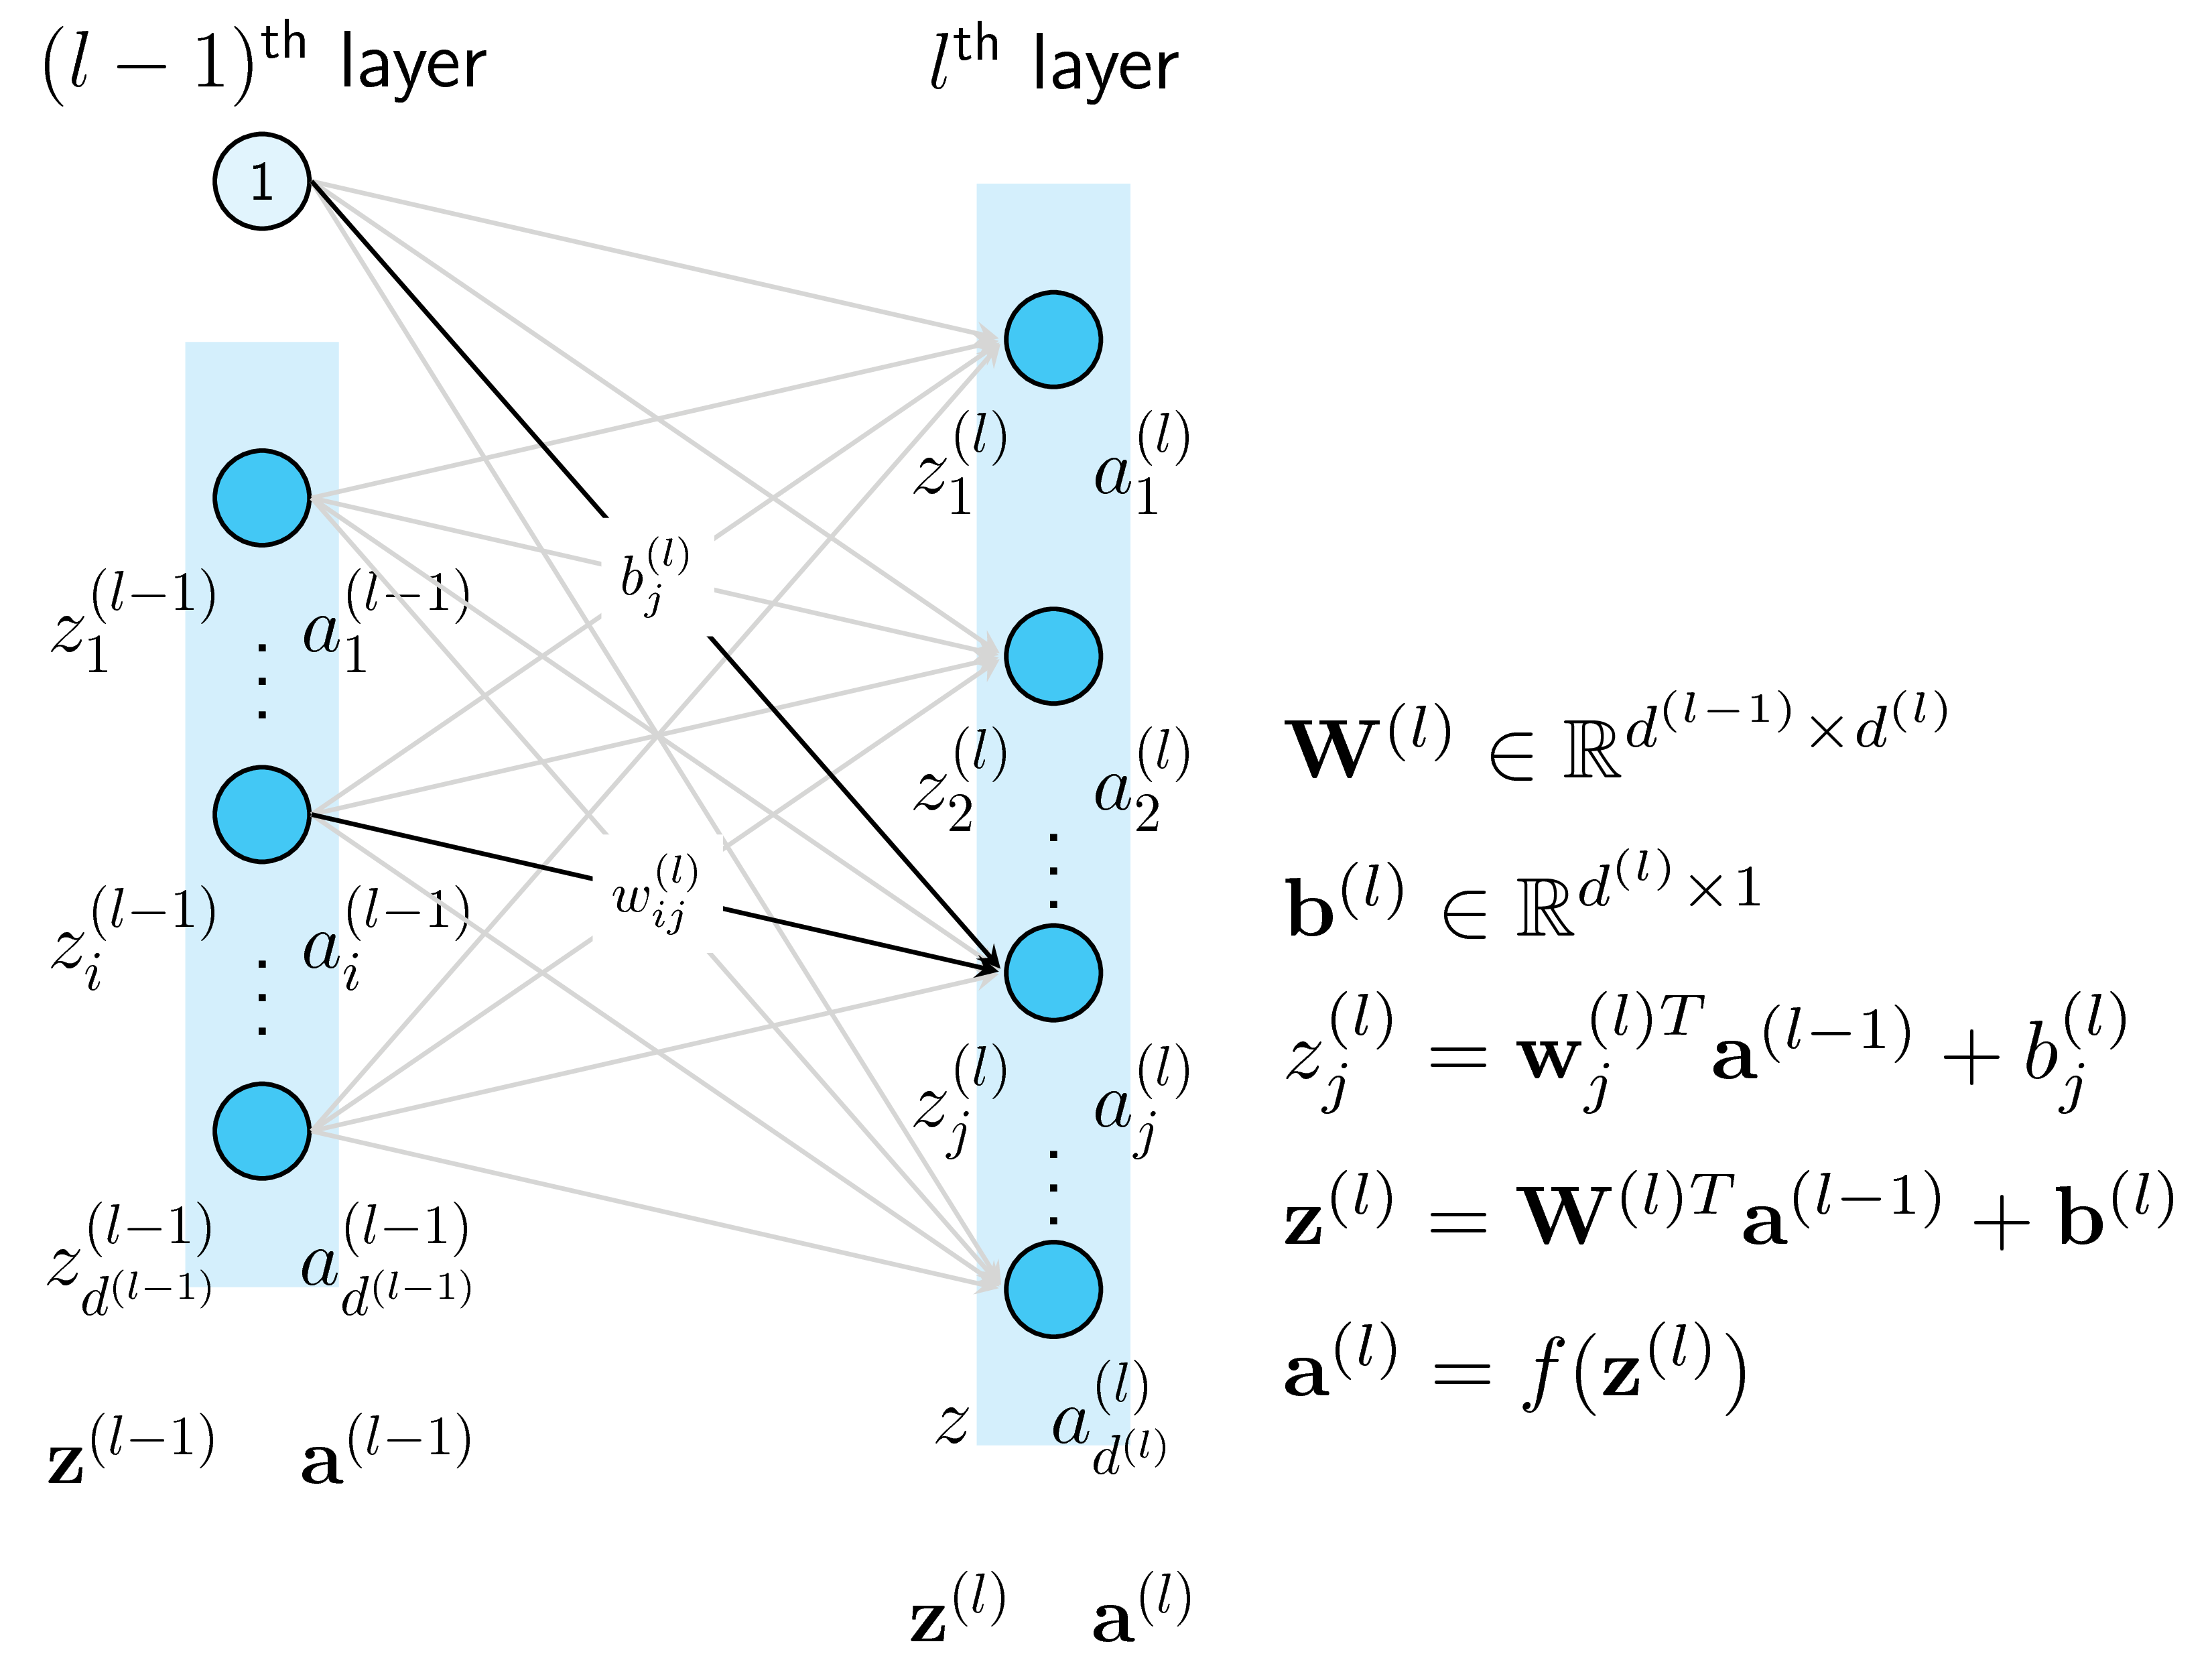

so basically, this neural network archetechture is inspired by human neuroligical connections. For each nodes is each neuron, which basically the reservoir of data and informations

and when interconnected to other nodes, which in this circumstances is in the hidden layer, computationally it will create a linear functions(or any functions), and the results will again be the input of a function.

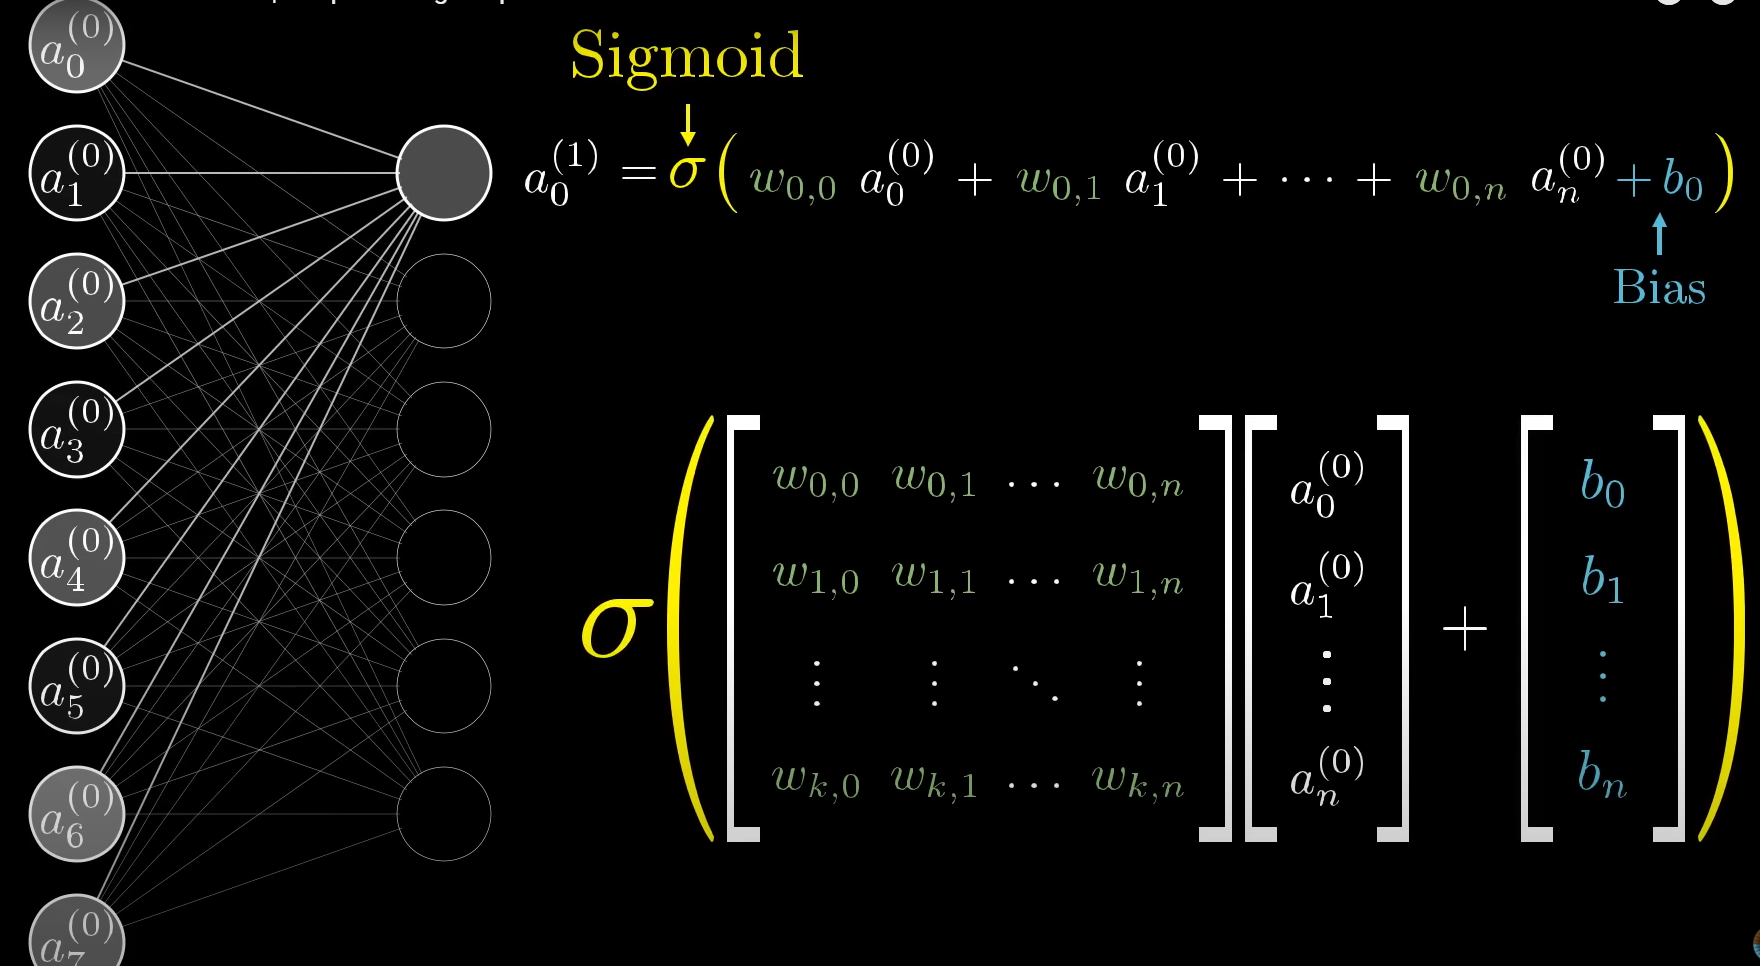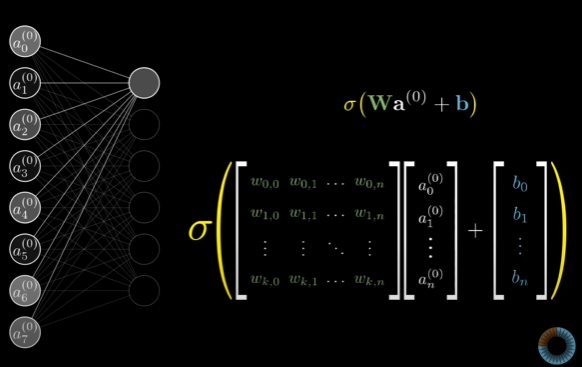






this is further explained with this matrix, which i have taken at 3Blue1Brown, who is using the example of a data of


with the $W$ represents the data 28x28 bits of handwritten numbers. and the $a^n$ represents the second nodes next to the data or related to the architechture.

so, the things that the neural network has to either automatically or manually execute the maneuver of altercating the structure is the bias number, and the amount of layers, or $L$

And this will execute like a loop. After using the data to create a certain data, or i'll say as $a^1$ or

with the fact that $f(.)$ is an activation function.

$$
f(Wa^{(0)} +b) = a^{(1)}
$$

or

$$
a_i^{(l)} = f(W^{(l).T}a^{(l-1)} +b_i^{(l)})
$$

or in the vector form, which is more applicable

$$
a_i^{(l)} = f(w_i^{(l).T}a^{(l-1)} +b_i^{(l)})
$$

with f(x) here is the sigmoid functions, which the intensity of the white spot in the handwritten number

$$
σ =\frac{1}{1 + e^-y}= \frac{1}{1 + e^{-f(Wa^{(0)} +b)}} = \frac{1}{1 + e^{-a^{(1)}}}
$$

and then so on, and so on. using the same principle until the final output. (don't for get the the bias node will always = 1, and it only multiply and alternates after using it and interpreted it.)

##ReLU (Recitfied Linear Unit)

**Comparison between ReLu and Tanh function**

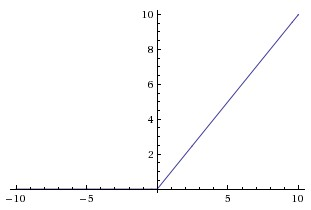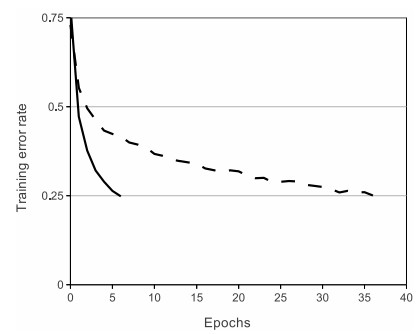

as i have discuss in a different files or discussion, the Sigmoid and Tanh are 2 widely used functions for the constant alternation of turning the closeness of 0 and 1.

Nevertheless, while sigmoid and tanh were monotonous, differentiable and popular activation functions, the functions is too saturate, thus emerging a problem called vanishing gradients (Vanishing gradient problem is a phenomenon that occurs during the training of deep neural networks, where the ***gradients that are used to update the network become extremely small*** or "vanish" as they are backpropogated from the output layers to the earlier layers.), **so another supplant is Rectified Linear Unit (RELU)**



Nevertheless, based on https://builtin.com/machine-learning/relu-activation-function: "The main reason ReLU wasn’t used until more recently is because it was not differentiable at the point zero. Researchers tended to use differentiable activation functions like sigmoid and tanh. However, it’s now determined that ReLU is the best activation function for deep learning." meaning that the most optimizing way for neural network is using ReLU

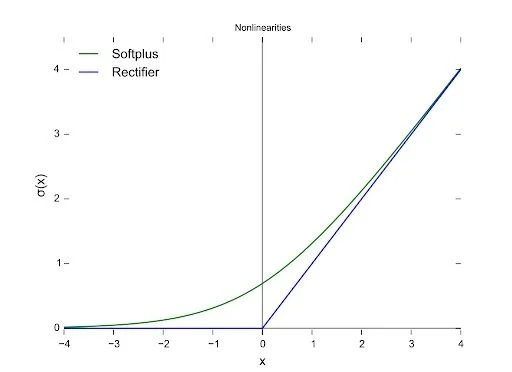

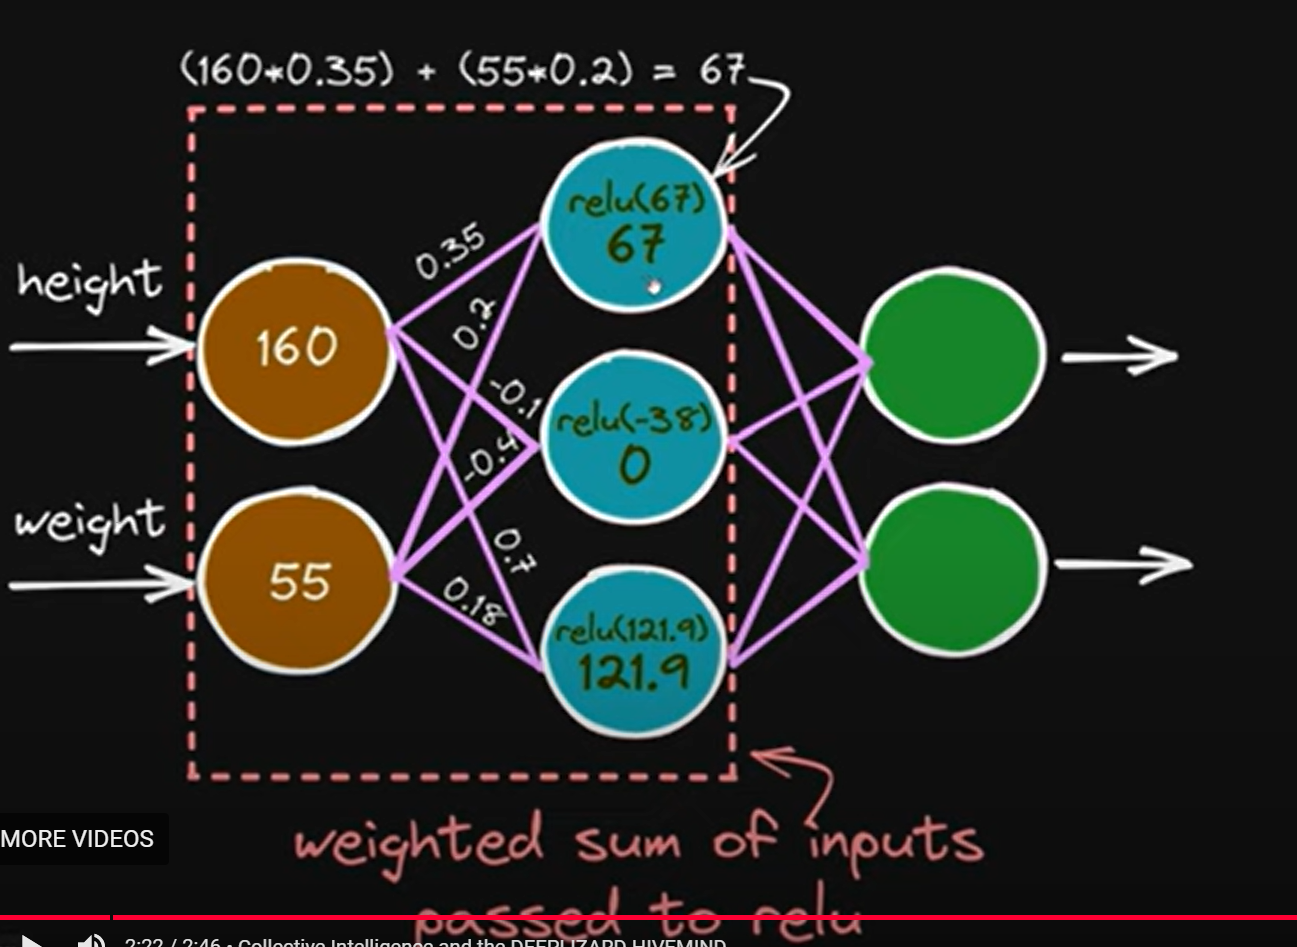

so basically, we have the function of ReLU is basically the maximum results of the whole nodes or just:



$$
f(x) = max(0,z)
$$

or basically eliminates all of the negative values and 0 and instead supplant it to 0 and the positive ones stays the same, which is like much quicker to show the meaning of on and off/ 0 and 1 much optimal than sigmoid and tanh

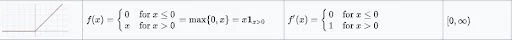

but the negatives are absoulutely obvious taken from https://builtin.com/machine-learning/relu-activation-function:

"The main issue with ReLU is that all the negative values become zero immediately, which decreases the ability of the model to fit or train from the data properly.

That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turn affects the resulting graph by not mapping the negative values appropriately. This can however be easily fixed by using the different variants of the ReLU activation function, like the leaky ReLU and other functions discussed earlier in the article.

This is just a short introduction to the rectified linear unit and its importance in deep learning technology today. It’s more popular than all other activation functions, and for good reason.

 "

##Important Libraries

WE WILL TOUCH TENSORFLOW NOW, SO THIS WILL NO LONGER TOUCH SKLEARN :)) AFTER CERTAIN AMOUNT OF TIME, I CAN FINALLY USE TENSORFLOW"

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

from keras.layers import Dense
'''
Dense is a fully connected neural network layer, meaning every neuron is
connected to every neuron in the previous and next layers.

It’s the most common type of layer used in feedforward neural networks.

You can specify:

units: number of neurons in the layer

activation: activation function like 'relu', 'sigmoid', 'softmax', etc.

this dictates the type of functions we will use
'''
from keras.optimizers import SGD

'''
SGD stands for Stochastic Gradient Descent, a classic optimization algorithm
used to update weights during training.

It's used to minimize the loss by updating weights in the opposite
direction of the gradient.

You can customize it with parameters like:

learning_rate: how big each step is

momentum: to help accelerate gradients in right direction

nesterov: to enable Nesterov momentum
'''
from keras.models import Sequential
'''
Sequential is a linear stack of layers — one layer after another.

Use it when your model has a single input and output and layers flow in a straight line.

You add layers using .add() or pass a list of layers directly.
'''
from keras.losses import CategoricalCrossentropy
'''
This is a loss function used for multi-class classification problems where labels are one-hot encoded.

It compares the predicted probability distribution with the true label distribution.

It penalizes wrong predictions more heavily if the model is confident but wrong.
'''

'\nThis is a loss function used for multi-class classification problems where labels are one-hot encoded.\n\nIt compares the predicted probability distribution with the true label distribution.\n\nIt penalizes wrong predictions more heavily if the model is confident but wrong.\n'

In [37]:
n_neuron_units = 8
'''
This is the number of neurons (or units) in the first Dense layer of the neural
network model. It determines the complexity of the model and can be adjusted
depending on the specific problem and the size of the data.
'''
len_features = 4
'''
This is the number of dimensions in the input data, i.e., the number of features
in each data sample. The first Dense layer needs to know the input shape to
build corresponding weights.
'''
n_classes = 3
'''
This is the number of classes to be predicted in the classification problem.
The final Dense layer of the model will have n_classes units, and the activation
function will be Softmax to convert the output into a probability distribution
over the classes.
'''
learning_rate = 0.01
'''
This is the learning rate of the optimization algorithm used during model
training. The learning rate determines how big the update steps are for the
weights during training.
'''
train_batch_size = 32
'''
This is the size of each batch of data used during training.
Training the model in batches helps speed up the process and save memory.
'''
n_epoch = 200
'''
This is the number of epochs, meaning how many times the model will go through
the entire training dataset. Each epoch passes through the full dataset once.
The number of epochs is also an important hyperparameter that must be chosen
carefully to avoid overfitting or underfitting.
'''


'\nThis is the number of epochs, meaning how many times the model will go through \nthe entire training dataset. Each epoch passes through the full dataset once. \nThe number of epochs is also an important hyperparameter that must be chosen \ncarefully to avoid overfitting or underfitting.\n'

In [38]:
iris_df = sns.load_dataset('iris')

x_train = iris_df.iloc[:,:-1]

y_train = iris_df['species']


In [39]:
def one_hot_encode(y): #just a simple prepreocession process, although i can probably use other methods or Label Encoder but im too lazy
    y_one_hot = []
    y_index = []

    for label in y:
        if label == 'setosa':
            y_one_hot.append([1, 0, 0])
            y_index.append(0)
        elif label == 'versicolor':
            y_one_hot.append([0, 1, 0])
            y_index.append(1)
        elif label == 'virginica':
            y_one_hot.append([0, 0, 1])
            y_index.append(2)

    return np.array(y_one_hot), np.array(y_index)

In [40]:
y_one_hot, y_index = one_hot_encode(y_train)
y_one_hot.shape

(150, 3)

In [41]:
y_one_hot[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [42]:
y_index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #this dictates the type of functions we will use
from tensorflow.keras.layers import Input #like .fit() in sklearn

def create_simple_model():
    model = Sequential([ #Sequential is a linear stack of layers — one layer after another.
                        #Use it when your model has a single input and output and layers flow in a straight line.
        Input(shape=(len_features,)),  # Use Input() as the first layer, and len_features
                                       # is thenumber of dimensions in the input data
        Dense(units=n_neuron_units, activation="relu"), #number of neurons
                                                        #(or units) in the first Dense layer
        Dense(units=n_classes, activation="softmax"), # number of classes to be predicted
        #softmax regression will be mentioned in the next page??
    ])
    model.summary()
    return model

In [44]:
model = create_simple_model()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
categorical_cross_entropy_loss = CategoricalCrossentropy()
# CategoricalCrossentropy is chosen as the loss function to measure the difference
# between the model's predictions and the actual labels during training.
#or basically it's like sklearn.metrics

# Init optimizer
sgd_opt = SGD(learning_rate=learning_rate)
# SGD is used as the optimizer for the model, and the learning rate is set using the variable `lr`.

# Compile model
model.compile(loss=categorical_cross_entropy_loss, optimizer=sgd_opt)
# model.compile() is used to configure/to arrange something or put its parts
#together in a particular form or arrangement the model before starting the training process.

In [46]:
history = model.fit(
    x=x_train,
    y=y_one_hot,
    batch_size=train_batch_size,
    epochs=n_epoch
)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3249  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0774 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0379 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9829 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9451 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9130 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8815 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8339 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8180 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7968 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7609 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7565 
Epoch 13/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7343 
Epoch 14/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7136 
Epoch 15/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7020 
Epoch 16/200
5/5 ━

In [47]:
y_pred_prob = model.predict(x_train)
y_pred_prob

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[9.81126130e-01, 1.88717842e-02, 2.23789857e-06],
       [9.59837258e-01, 4.01531160e-02, 9.66800326e-06],
       [9.73163545e-01, 2.68298835e-02, 6.49567119e-06],
       [9.62521195e-01, 3.74644771e-02, 1.43572252e-05],
       [9.83880520e-01, 1.61175504e-02, 2.03047102e-06],
       [9.82450008e-01, 1.75482705e-02, 1.79393328e-06],
       [9.75515246e-01, 2.44773198e-02, 7.45125908e-06],
       [9.75916207e-01, 2.40797009e-02, 4.02691148e-06],
       [9.54135478e-01, 4.58398387e-02, 2.47072476e-05],
       [9.66504395e-01, 3.34882699e-02, 7.25691598e-06],
       [9.84598637e-01, 1.54002141e-02, 1.12387534e-06],
       [9.73745048e-01, 2.62483824e-02, 6.57637429e-06],
       [9.64596868e-01, 3.53943482e-02, 8.58583644e-06],
       [9.73681331e-01, 2.63094231e-02, 9.29037651e-06],
       [9.92617369e-01, 7.38246646e-03, 1.66267384e-07],
       [9.93240535e-01, 6.75921887e-03, 2.33813182e-07],
       [9.87971902e-01, 1.20272348e-02, 7.74693206e-07],
       [9.78615880e-01, 2.13811

In [48]:
y_pred = np.argmax(y_pred_prob, axis=1) #argument max means to find x for its maximum
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_index))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      1.00      0.97        47
           2       1.00      0.94      0.97        53

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

